$\textbf{*** This version uses the }\texttt{Dataloader, Asset, Portfolio}\textbf{ classes to load data}$

In [1]:
import sys
import importlib
sys.path.append('../')

from IPython.display import display, Math, Latex

# From data_preparation classes
from src.finance_ml.data_preparation.data_preparation import DataLoader

from src.finance_ml.indicators.indicators import Indicators

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Import required packages
import pandas as pd
import numpy as np

## Reading the Data File

In [4]:
# Defining time_index_col (must be the same column in all inputs) and keep_cols refering to the columns that will remain in the dataset
dataloader = DataLoader(time_index_col= 'DATE', 
                    keep_cols = ['VOLUME','OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW','TRANSACTIONS'])

Here we will select $N=10,000$ ticks from our database for simplicity. We also select the equity $\textbf{USDBRL}$ from  the data available.

In [5]:
# Example Files
fname_RUBEUR = 'FX/RUBEUR_2020-04-07_2022-04-06.parquet'
fname_USDBRL = 'FX/USDBRL_2020-04-07_2022-04-06.parquet'
fname_AAPL = 'equities/AAPL_2020-04-07_2022-04-06.parquet'
fname_BTCUSD = 'cryptos/BTCUSD_2020-04-07_2022-04-06.parquet'

# No. of Records from example dataset
N = 10000

In [6]:
# Dataset chosen in this simulation
ticker = 'USDBRL'
fname = fname_USDBRL

In [7]:
# loading assets into to an unique df
df = dataloader.load_dataset({ticker:'../data/'+fname}).iloc[:N]
display(df)

,USDBRL_VOLUME,USDBRL_OPEN,USDBRL_HIGHT,USDBRL_LOW,USDBRL_CLOSE,USDBRL_VW,USDBRL_TRANSACTIONS
DATE,,,,,,,
2020-04-07 18:54:00,2,5.22120,5.22125,5.22120,5.22125,5.2212,2
2020-04-07 18:55:00,3,5.22115,5.22125,5.22115,5.22125,5.2212,3
2020-04-07 18:59:00,2,5.22110,5.22115,5.22110,5.22115,5.2211,2
2020-04-07 19:02:00,1,5.22120,5.22120,5.22120,5.22120,5.2212,1
2020-04-07 19:03:00,3,5.22135,5.22135,5.22105,5.22105,5.2212,3
...,...,...,...,...,...,...,...
2020-04-27 14:14:00,10,5.69465,5.69465,5.69190,5.69190,5.6937,10
2020-04-27 14:15:00,9,5.69065,5.70145,5.69065,5.70081,5.6986,9
2020-04-27 14:16:00,10,5.70066,5.70295,5.70066,5.70270,5.7019,10


In [8]:
data_cols = ['DATE', 'OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'VOLUME']

"""
# Columns of indicators with default parameters
var_cols = ['CLOSE_returns',
       'CLOSE_log_returns', 'CLOSE_price_change',
       'CLOSE_pct_change', 'RA_5', 'RA_10', 'AMPL',
       'OPNCLS', 'MA_5', 'MA_10', 'V_MA_5', 'V_MA_10',
       'V_MA_20', 'KAMA_w10p(02,30)', 'PPO_w(26,12)',
       'PVO_w(26,12)s09', 'PVOH_w(26,12)s09',
       'PVOsgn_w(26,12)s09', 'ROC_w12', 'RSI_w14',
       'StRSI_w14s(03,03)', 'StRSId_w14s(03,03)',
       'StRSIk_w14s(03,03)', 'SO_w14s03', 'SOsgn_w14s03',
       'AOI_w(05,34)', 'TSI_w(25,13)',
       'UO_wi(07,14,28)wg(4.0,2.0,1.0)', 'WRI_14', 'ADI',
       'CMF_w20', 'EOM_w14', 'EMV_w14', 'FI_w13',
       'MFI_w14', 'NVI', 'OBV', 'VPT', 'VWAP_w14',
       'ADXP_w14', 'ADXN_w14', 'AROOND_w25', 'AROON_w25',
       'AROONU_w25', 'CCI_w20', 'DPO_w20', 'EMA_w14','SMA_w14',
       'ICHIA_w(09,26,52)', 'ICHIB_w(09,26,52)',
       'ICHIBL_w(09,26,52)', 'ICHICL_w(09,26,52)',
       'KST_r(10,15,20,30)_w(10,10,10,15)',
       'KSTD_r(10,15,20,30)_w(10,10,10,15)',
       'KSTS_r(10,15,20,30)_w(10,10,10,15)', 'MACD_w(26,12,09)',
       'MACDD_w(26,12,09)', 'MACDS_w(26,12,09)', 'MI_w(09,25)',
       'PSAR_s(0.02,0.2)', 'PSARD_s(0.02,0.2)',
       'PSARDI_s(0.02,0.2)', 'PSARU_s(0.02,0.2)',
       'PSARUI_s(0.02,0.2)', 'STC_w(50,23)c10s(03,03)',
       'TRIX_w15', 'VI_w14', 'VIN_w14', 'VIP_w14',
       'WMA_w09']
"""

var_cols = ['HIGHT',
       'CLOSE', 'OPEN', 'LOW',
       'VOLUME','VWAP_w14','MFI_w14']

# For each of calculated column, we add the ticker code, as standardized by class 𝙳𝚊𝚝𝚊𝙻𝚘𝚊𝚍𝚎𝚛
var_cols = [ticker+'_'+col for col in var_cols]
norm_cols = [col + '_norm' for col in var_cols]

In [9]:
print(var_cols)

['USDBRL_HIGHT', 'USDBRL_CLOSE', 'USDBRL_OPEN', 'USDBRL_LOW', 'USDBRL_VOLUME', 'USDBRL_VWAP_w14', 'USDBRL_MFI_w14']


In [10]:
print(norm_cols)

['USDBRL_HIGHT_norm', 'USDBRL_CLOSE_norm', 'USDBRL_OPEN_norm', 'USDBRL_LOW_norm', 'USDBRL_VOLUME_norm', 'USDBRL_VWAP_w14_norm', 'USDBRL_MFI_w14_norm']


# Indicators

## Calculate Indicators

In [11]:
# Process data normalization
norm_data = True

# Select Indicator transformer
ind_processor = Indicators(ticker = ticker, norm_data = True, calc_all = False, list_ind = ["VWAP","MFI"])


# Calculate Indicators over input dataframe
df = ind_processor.fit_transform(df)


if (norm_data):
    df_norm = ind_processor.data_norm

In [12]:
# Display dataframe with Indicators
df_results=df[var_cols].dropna(axis=0)
display(df[var_cols].dropna(axis=0))

,USDBRL_HIGHT,USDBRL_CLOSE,USDBRL_OPEN,USDBRL_LOW,USDBRL_VOLUME,USDBRL_VWAP_w14,USDBRL_MFI_w14
DATE,,,,,,,
2020-04-07 19:34:00,5.22170,5.22165,5.22170,5.22165,2,5.221324,53.572559
2020-04-07 19:37:00,5.22155,5.22155,5.22155,5.22155,1,5.221339,51.725154
2020-04-07 19:39:00,5.22165,5.22165,5.22160,5.22155,3,5.221380,62.070041
2020-04-07 19:40:00,5.22155,5.22145,5.22155,5.22145,2,5.221404,62.069754
2020-04-07 19:44:00,5.22160,5.22155,5.22160,5.22155,2,5.221422,63.334220
...,...,...,...,...,...,...,...
2020-04-27 14:14:00,5.69465,5.69190,5.69465,5.69190,10,5.693147,68.869967
2020-04-27 14:15:00,5.70145,5.70081,5.69065,5.69065,9,5.693731,77.359284
2020-04-27 14:16:00,5.70295,5.70270,5.70066,5.70066,10,5.694751,77.574893


In [13]:
# Display dataframe with Indicators of normalized data
if (norm_data):
    display(df_norm[norm_cols].dropna(axis=0))

,USDBRL_HIGHT_norm,USDBRL_CLOSE_norm,USDBRL_OPEN_norm,USDBRL_LOW_norm,USDBRL_VOLUME_norm,USDBRL_VWAP_w14_norm,USDBRL_MFI_w14_norm
DATE,,,,,,,
2020-04-07 19:34:00,-0.508587,-0.503895,-0.502926,-0.502673,-0.866667,-0.505266,0.071451
2020-04-07 19:37:00,-0.509020,-0.504183,-0.503360,-0.502962,-1.000000,-0.505225,0.034503
2020-04-07 19:39:00,-0.508731,-0.503895,-0.503215,-0.502962,-0.733333,-0.505103,0.241401
2020-04-07 19:40:00,-0.509020,-0.504472,-0.503360,-0.503251,-0.866667,-0.505033,0.241395
2020-04-07 19:44:00,-0.508876,-0.504183,-0.503215,-0.502962,-0.866667,-0.504981,0.266684
...,...,...,...,...,...,...,...
2020-04-27 14:14:00,0.856545,0.852856,0.863883,0.856235,0.200000,0.877125,0.377399
2020-04-27 14:15:00,0.876173,0.878563,0.852323,0.852622,0.066667,0.878839,0.547186
2020-04-27 14:16:00,0.880502,0.884016,0.881251,0.881549,0.200000,0.881825,0.551498


<Axes: xlabel='DATE'>

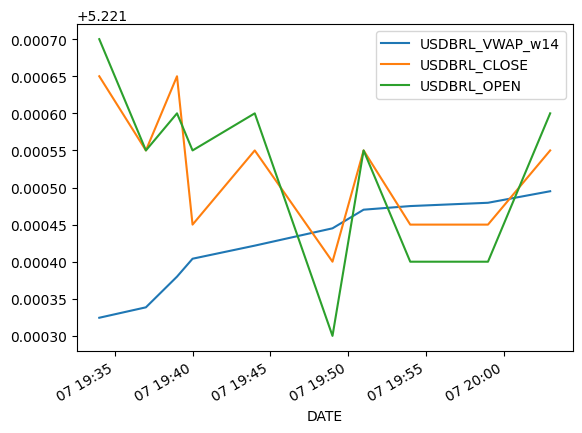

In [14]:
df_results[0:10].plot(y=['USDBRL_VWAP_w14', 'USDBRL_CLOSE', 'USDBRL_OPEN'], kind='line')

<Axes: xlabel='DATE'>

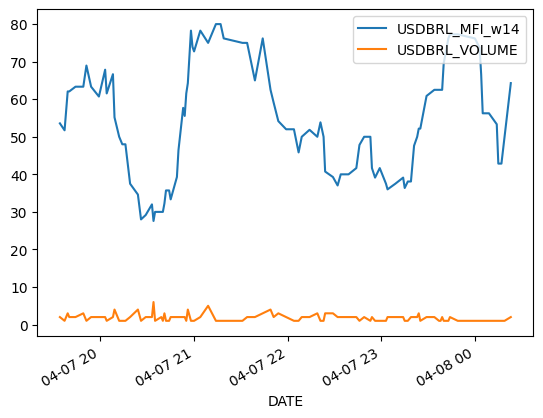

In [22]:
df_results[0:100].plot(y=['USDBRL_MFI_w14','USDBRL_VOLUME'], kind='line')

<Axes: xlabel='DATE'>

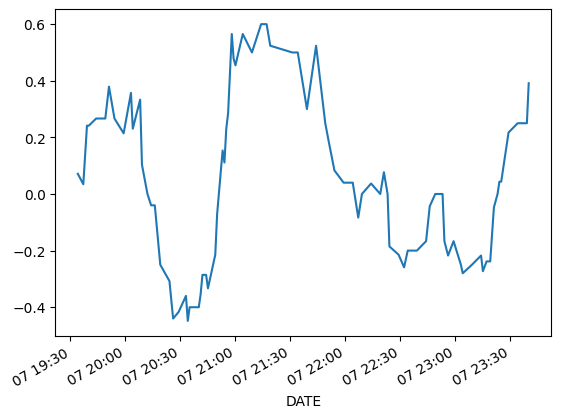

In [25]:
df_volume = df_norm.USDBRL_MFI_w14_norm
df_volume[0:100].plot(kind="line")